# Clasificador de Bayes Ingenuo

Este clasificados parte de la suposición de que las muestras son i.i.d (independientes e idénticamente distribuidas). La idea es maximizar la probabilidad *a posteriori*:

$$P(c_j|\mathbf{x})=\frac{P(\mathbf{x}|c_j)P(c_j)}{P(\mathbf{x})},$$

donde $P(\mathbf{x}|c_j)$ es la función de verosimilitud, $P(c_j)$ es la probabilidad *a priori* o *prior* y $P(\mathbf{x})$ es la evidencia.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#importamos las librerías para la clasificación
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation

In [16]:
def visualizar_clasificador(clasificador, X, y):
    #definimos los máximos valores de X e y para la malla
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0 
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    #definimos el paso de la malla
    mesh_step_size = 0.01
    #definimos la malla para x e y
    x_vals, y_vals = np.mgrid[min_x:max_x:mesh_step_size, min_y:max_y:mesh_step_size]
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    #reordenamos la salida
    print(resultados)
    resultados = resultados.reshape(x_vals.shape)
    #creamos la figura
    plt.figure()
    #elegimos los colores
    plt.pcolormesh(x_vals,y_vals,resultados,cmap=plt.cm.OrRd)
    #ubicamos los puntos
    plt.scatter(X[:,0],X[:,1],c=y,s=75,edgecolors='black',linewidth=1,cmap=plt.cm.OrRd)
    #especificamos los límites de la gráfica
    plt.xlim(x_vals.min(), x_vals.max()) 
    plt.ylim(y_vals.min(), y_vals.max())
    #especificamos los puntos que se visualizarán sobre los ejes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0))) 
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    #Graficamos
    plt.show()

In [10]:
#almacenamos el nombre del archivo
archivo = 'Datos.txt'
#cargamos los datos
data = np.loadtxt(archivo, delimiter=',')
#separamos los datos de las etiquetas
X, y = data[:,:-1], data[:,-1]
#hacemos una partición 80/20
X_train, X_test, y_train, y_test = \
cross_validation.train_test_split(X,y,test_size=0.2, random_state = 3)

In [20]:
#instanciamos el clasificador
clasificador = GaussianNB()
#entrenamos el clasificador
clasificador.fit(X_train, y_train)
#validamos el clasificador
y_pred = clasificador.predict(X_train)
#calculamos el acierto de clasificación
acc = 100.0*(y_train== y_pred).sum()/X_train.shape[0]
#imprimimos el resultado
print('El acierto de clasificación es el ',acc,'%')


El acierto de clasificación es el  99.6875 %


[ 0.  0.  0. ...,  2.  2.  2.]


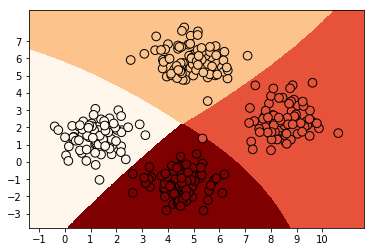

In [21]:
visualizar_clasificador(clasificador, X_train, y_train)